In [61]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree 
import matplotlib.pyplot as plt


In [62]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df=pd.read_csv(url)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [63]:
#assigninig column name 
df.columns=['Recency','Frequency','Monetary','Time','Donated']
df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [64]:
x=df.drop('Donated',axis=1)
y=df['Donated']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=5,random_state=42)
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [67]:
y_pred=clf.predict(x_test)


In [68]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.78


In [69]:
print(confusion_matrix(y_test,y_pred))

[[108   5]
 [ 28   9]]


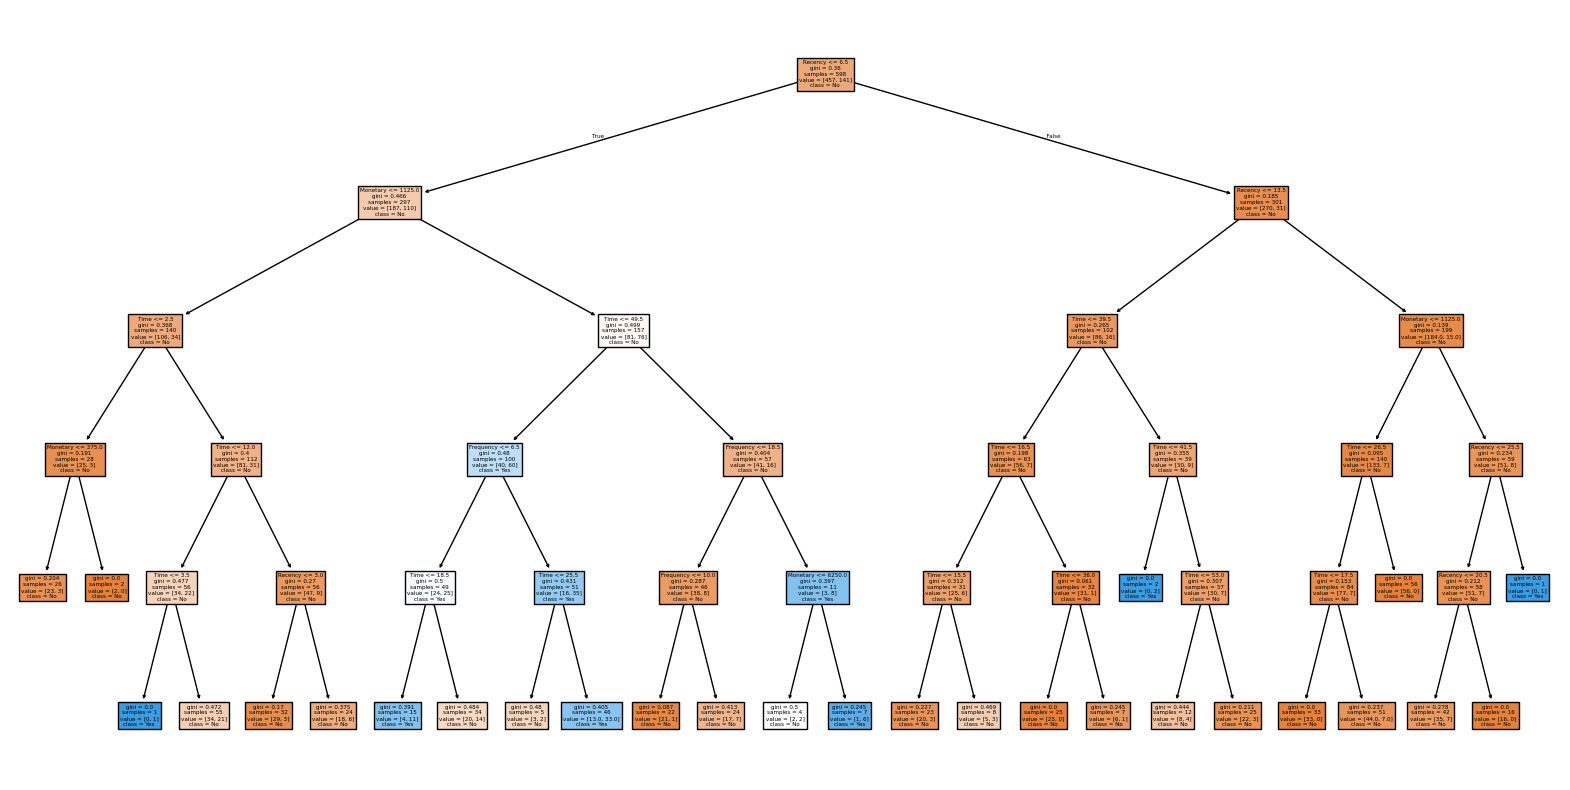

In [70]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,filled=True,feature_names=x.columns,class_names=['No','Yes'])
plt.show()

Hyper Parameter Tuning


In [71]:
params = [
    {"criterion":"gini", "max_depth":5, "min_samples_split":5},
    {"criterion":"gini", "max_depth":10, "min_samples_split":5},
    {"criterion":"entropy", "max_depth":5, "min_samples_split":5},
    {"criterion":"entropy", "max_depth":8, "min_samples_split":5}
]


In [72]:
for param in params:
    clf = DecisionTreeClassifier(
        criterion=param["criterion"],
        max_depth=param["max_depth"],
        min_samples_split=param["min_samples_split"],
        random_state=42
    )
   
    # Fit the classifier with the correct training data
    clf.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the parameters and accuracy
    print(f"Params: {param}")
    print(f"Accuracy: {accuracy:.2f}")
    
    # Print the confusion matrix
    print(confusion_matrix(y_test, y_pred))

Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.78
[[108   5]
 [ 28   9]]
Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.66
[[88 25]
 [26 11]]
Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.79
[[104   9]
 [ 23  14]]
Params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5}
Accuracy: 0.71
[[96 17]
 [27 10]]
